In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import time
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import set_config
set_config(display='diagram')
pd.options.display.max_columns = 999
set_config(display='diagram')


In [204]:
#reading in the data
cross = pd.read_csv('l1_data.csv')

In [205]:
cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7393 entries, 0 to 7392
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   physician_id                     7393 non-null   int64  
 1   physician_efficiency             7393 non-null   float64
 2   metro_area                       7393 non-null   object 
 3   physician_working_specialty      7393 non-null   object 
 4   physician_gender                 7393 non-null   object 
 5   physician_credential             7393 non-null   object 
 6   physician_med_school             7393 non-null   object 
 7   physician_graduation_year        6674 non-null   float64
 8   bump_feature                     7393 non-null   int64  
 9   engineered_feature_1             7393 non-null   float64
 10  engineered_feature_2             7393 non-null   float64
 11  engineered_feature_3             7393 non-null   float64
 12  medicare_engineered_

In [206]:
cross.sample(5)

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
615,846,0.90,Chicago,Family Practice,U,UNKNOWN,UNKNOWN,NaN,2938,0.824,0.929,11.6,2.50,3,2,1,5,2,285,1.237
2841,3837,0.88,Chicago,Nephrology,M,UNKNOWN,MICHIGAN STATE UNIVERSITY COLLEGE OF HUMAN MED...,2003.0,2660,1.335,1.330,5.0,3.25,3,5,2,1,5,857,3.649
6449,8737,1.14,Chicago,Allergy-Immunology,F,UNKNOWN,RUSH MEDICAL COLLEGE OF RUSH UNIVERSITY,1977.0,6970,1.646,1.646,13.2,2.75,3,2,1,4,4,142,1.194
4108,5554,0.91,Chicago,Radiology,F,MD,OTHER,1994.0,3164,1.009,1.009,4.4,1.50,2,0,1,0,2,1348,1.792
6140,8311,0.82,Chicago,Internal Medicine,M,MD,CASE WESTERN RESERVE UNIVERSITY SCHOOL OF MEDI...,1985.0,1968,0.976,0.976,11.9,4.25,4,5,4,5,3,370,1.105


In [207]:
#setting a dataframe with only unknown schools
unknown =cross[cross['physician_med_school'] == 'UNKNOWN']
#sorting physicians from unknown schools by efficiency scores, the most efficient (lowest score being first)
unknown.physician_efficiency.sort_values()


5122    0.15
3609    0.25
3151    0.27
1319    0.30
259     0.31
        ... 
2419    2.25
5783    2.41
2551    2.50
4174    2.52
1075    2.52
Name: physician_efficiency, Length: 699, dtype: float64

## Question 1: ID - 5122

In [208]:
#data frame with just chicago physicians
chicago =cross[cross['metro_area'] == 'Chicago']
chicago.dropna(inplace=True)

/Users/airtonkamdem/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [209]:
#df of docs with a family practice
fam = chicago[chicago['physician_working_specialty'] == 'Family Practice']
fam.dropna(inplace=True)
fam.sample(10)

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
2624,3550,0.88,Chicago,Family Practice,M,MD,UNIVERSITY OF HEALTH SCIENCES/CHICAGO MEDICAL ...,1981.0,2657,0.923,0.923,8.6,2.250,2,3,2,1,3,642,0.956
3885,5267,1.21,Chicago,Family Practice,F,MD,OTHER,1992.0,7595,1.070,1.002,9.8,2.333,2,3,0,3,1,221,1.013
267,363,1.35,Chicago,Family Practice,F,UNKNOWN,UNIVERSITY OF ILLINOIS AT CHICAGO HEALTH SCIEN...,2005.0,8503,1.211,1.211,7.4,2.000,2,3,1,2,2,138,1.336
678,937,1.21,Chicago,Family Practice,M,UNKNOWN,UNIVERSITY OF ILLINOIS AT CHICAGO HEALTH SCIEN...,1993.0,7562,1.147,1.150,6.6,2.000,2,1,1,1,5,82,0.947
5858,7912,1.22,Chicago,Family Practice,M,MD,SOUTHERN ILLINOIS UNIVERSITY SCHOOL OF MEDICINE,2001.0,7702,1.226,1.125,10.7,2.333,2,2,0,4,1,210,1.335
414,574,0.74,Chicago,Family Practice,M,UNKNOWN,UNIVERSITY OF ILLINOIS AT CHICAGO HEALTH SCIEN...,1994.0,1201,0.844,0.944,12.7,2.333,2,1,0,5,1,62,1.474
5493,7401,0.87,Chicago,Family Practice,F,UNKNOWN,OTHER,1995.0,2569,0.769,0.789,2.8,2.500,3,3,1,2,4,234,1.297
4838,6528,1.11,Chicago,Family Practice,F,MD,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",2002.0,6574,1.069,1.001,4.2,2.000,2,2,1,3,2,120,1.316
5773,7791,0.94,Chicago,Family Practice,M,UNKNOWN,OTHER,1971.0,3721,0.990,1.022,4.5,3.500,4,3,4,4,3,440,1.205
5255,7082,0.96,Chicago,Family Practice,F,UNKNOWN,NORTHWESTERN UNIVERSITY MEDICAL SCHOOL,1999.0,4044,1.044,1.044,11.6,3.000,3,4,5,1,2,197,1.065


In [210]:
#seeing the distribution of years graduated
fam['physician_graduation_year'].value_counts(normalize=True)

1996.0    0.049658
1999.0    0.044521
1997.0    0.042808
2002.0    0.041096
2008.0    0.037671
2000.0    0.034247
1994.0    0.034247
1998.0    0.032534
1995.0    0.032534
2010.0    0.030822
2004.0    0.029110
1984.0    0.029110
1991.0    0.029110
1988.0    0.027397
1987.0    0.027397
1981.0    0.027397
1989.0    0.027397
2009.0    0.027397
2003.0    0.025685
2007.0    0.025685
1993.0    0.023973
1990.0    0.023973
2005.0    0.023973
1986.0    0.022260
2006.0    0.022260
1983.0    0.020548
2001.0    0.018836
1980.0    0.017123
1979.0    0.017123
1992.0    0.015411
1985.0    0.015411
2011.0    0.015411
1978.0    0.013699
1977.0    0.011986
1974.0    0.011986
1976.0    0.011986
1970.0    0.008562
1982.0    0.008562
1973.0    0.005137
2014.0    0.005137
1975.0    0.005137
1972.0    0.005137
1971.0    0.005137
9999.0    0.003425
2012.0    0.001712
1969.0    0.001712
1961.0    0.001712
1963.0    0.001712
3000.0    0.001712
1964.0    0.001712
1959.0    0.001712
Name: physician_graduation_year

In [211]:
#seeing what the median year of graduation is 
fam.physician_graduation_year.median()

1996.0

In [212]:
#seeing what the mean year of graduation is
fam.physician_graduation_year.mean()


2023.3253424657535

## Question 2: 1996 is the median graduation year but 2023 appears to be the mean graduation year for chicago physicians with a family practice -- the mean value is odd in this case, I suggest we trust the median value instead

In [213]:
#seeing the distribution of physician specialties
chicago.physician_working_specialty.value_counts()

Internal Medicine                     655
Family Practice                       584
OB/GYN                                296
Radiology                             246
Gastroenterology                      168
                                     ... 
Pediatric Surgery                       1
Pediatric Neurology                     1
Pediatric Otolaryngology                1
Pediatric Hospital Based Physician      1
Reproductive Endocrinology              1
Name: physician_working_specialty, Length: 63, dtype: int64

In [214]:
#setting DF with only oncology and family practice specialists
sub = cross[(cross['physician_working_specialty']=='Family Practice' ) | (cross['physician_working_specialty']=='Oncology')]

In [215]:
# seeing the normaliz3d distribution of specialties
sub['physician_working_specialty'].value_counts(normalize=True)


Family Practice    0.84856
Oncology           0.15144
Name: physician_working_specialty, dtype: float64

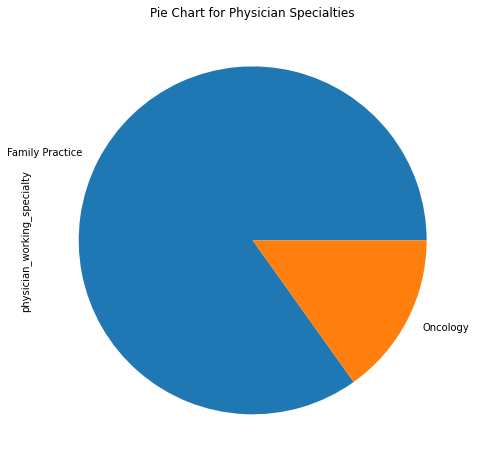

In [216]:
#visualizing the distribution of specialties
sub['physician_working_specialty'].value_counts().plot.pie(figsize=(8, 8))
plt.title('Pie Chart for Physician Specialties')
plt.show()


In [217]:
import plotly.express as px

### Question 3: Family Practicioners (avg efficiency of 1.05) are slightly more efficient than oncologists(1.08 ) as visualized below 

In [219]:
df = px.data.tips()
fig = px.histogram(sub, x="physician_working_specialty", y="physician_efficiency",
                   histfunc='avg',
                   height=400)
fig.show()


In [220]:
cross.head(2)

,physician_id,physician_efficiency,metro_area,physician_working_specialty,physician_gender,physician_credential,physician_med_school,physician_graduation_year,bump_feature,engineered_feature_1,engineered_feature_2,engineered_feature_3,medicare_engineered_1,medicare_engineered_2,medicare_engineered_3,medicare_enginerred_4,medicare_engineered_5,medicare_engineered_6,num_medicare_patients,medicare_patient_hcc_risk_score
0,2,0.92,Chicago,Radiology,M,UNKNOWN,BOSTON UNIVERSITY SCHOOL OF MEDICINE,1995.0,3228,1.132,1.154,7.7,2.5,3,0,2,0,3,1482,2.055
1,3,0.72,Chicago,Urology,M,MD,"LOYOLA UNIVERSITY OF CHICAGO, STRITCH SCHOOL O...",1976.0,1077,1.756,1.736,13.1,4.0,4,4,5,3,4,522,1.398


In [221]:
#visualizing the relationship between engineered_feature_1 and engineered_feature_2
fig = px.scatter(x=cross['engineered_feature_1'],
                 y=cross['engineered_feature_2'], trendline="ols")
fig.show()


## Question 4: it seems like there is a roughly linear relationship between engineered_feature_1 and engineered_feature_2, including both in a model may introduce some colinearity, the model would perform oaky with just one of these features

In [222]:
cross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7393 entries, 0 to 7392
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   physician_id                     7393 non-null   int64  
 1   physician_efficiency             7393 non-null   float64
 2   metro_area                       7393 non-null   object 
 3   physician_working_specialty      7393 non-null   object 
 4   physician_gender                 7393 non-null   object 
 5   physician_credential             7393 non-null   object 
 6   physician_med_school             7393 non-null   object 
 7   physician_graduation_year        6674 non-null   float64
 8   bump_feature                     7393 non-null   int64  
 9   engineered_feature_1             7393 non-null   float64
 10  engineered_feature_2             7393 non-null   float64
 11  engineered_feature_3             7393 non-null   float64
 12  medicare_engineered_

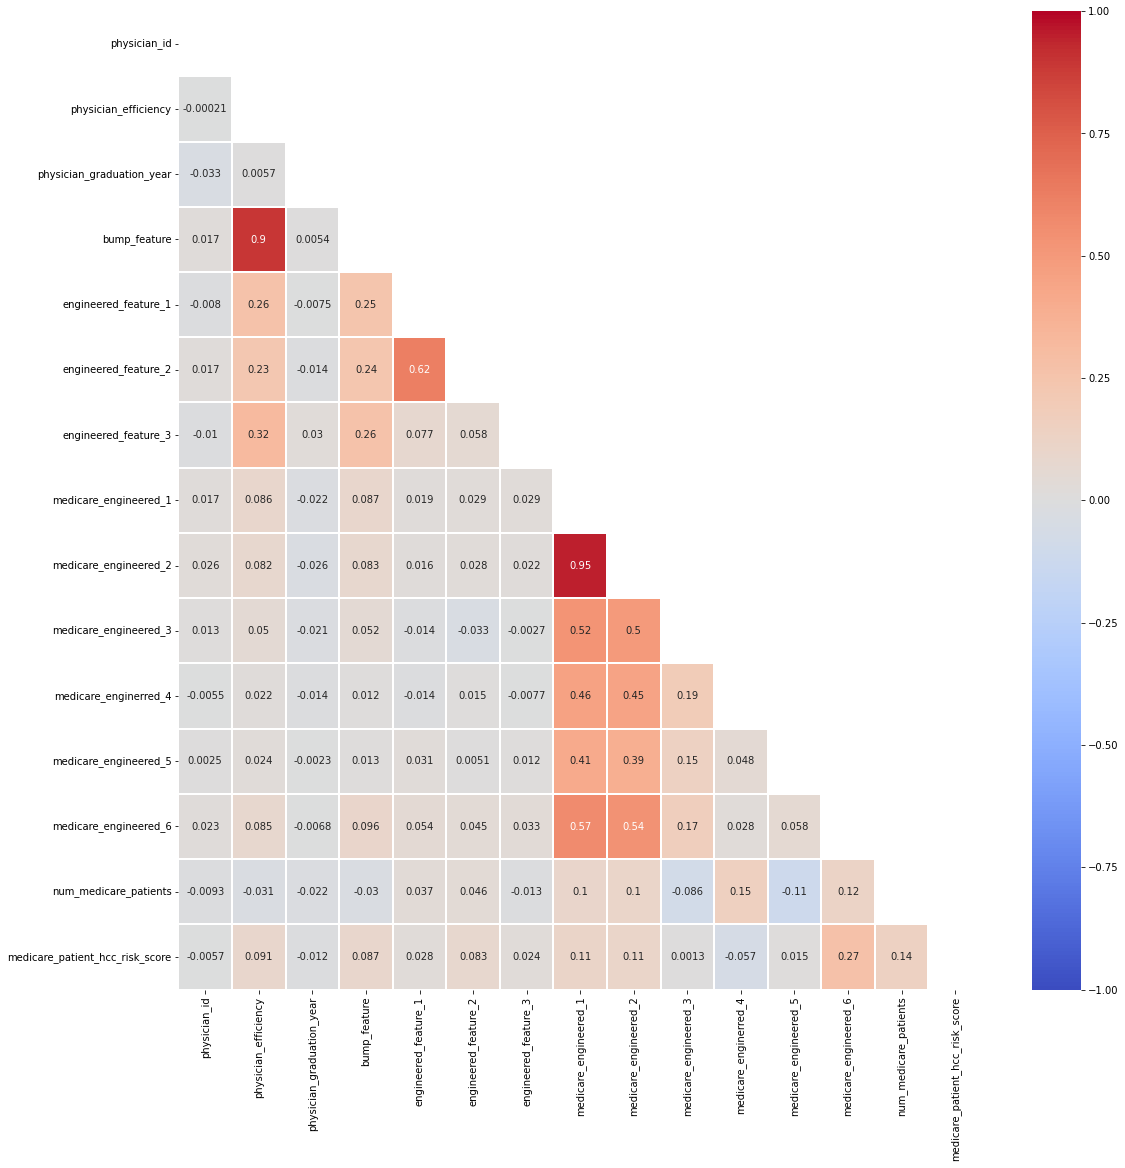

In [225]:
#setting a correlation matrix to identify highly correlated features
mask = np.zeros_like(cross.corr())
mask[np.triu_indices_from(mask)] = True

# # inspiration for heatmap parameters comes from jeff's work
plt.figure(figsize=(18,18))

sns.heatmap(
     cross.corr(),
     cmap='coolwarm',
     annot=True,
     mask=mask,
     vmin=-1.,
     vmax=1.,
     linewidths=.01,
     center=0
 );

## Question 5: I would drop rows/columns with null values and in cases of high correlation, I would drop one of the features that is highly correlated to the other, I would also drop the physician ID here since it is primarily a refence metric, I would also one hot encode the features that are in string format 

In [226]:
#dropping highly correlated features
crossed = cross.drop(
    columns=['engineered_feature_1', 'bump_feature', 'physician_id'])


In [227]:
#dropping NaN values that could interfere with modeling
crossed.dropna(inplace=True)

In [228]:
#one hot encoding the data to make use of string features in the model
x = pd.get_dummies(crossed, columns=[
                   'metro_area', 'physician_working_specialty', 'physician_gender', 'physician_credential', 'physician_med_school'])


In [231]:
#setting my X and y(target) data
X = x.drop(columns=['physician_efficiency'])
y = crossed['physician_efficiency']


In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)


In [234]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
pd.set_option('display.max_columns', None)

In [235]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)


LinearRegression()

In [237]:
#The R2 score is much too low (.22/1.00)
preds = lr.predict(X_test)
lr.score(X_train, y_train)

0.2299409000644751

## Question 6: the linear model is not a strong predictor in this case, the R2 and mean absolute errors as printed below are too far off - I prefer to rely on the mean absolute error because this usually gives me a good sense of how off-the-mark my model is on any given predictiction. 547 is so far off that it hints at either a flaw in the data, or model in its predictive ability for this target

In [238]:
def stats(ytrue, ypred):
    mae = mean_absolute_error(ytrue, ypred)
    print(f'Mean Absolute Error: {round(mae, 3)}')
    rmse = mean_squared_error(ytrue, ypred, squared=False)
    print(f'Mean Squared Error: {round(rmse, 3)}')
    r2 = r2_score(ytrue, ypred)
    print(f'R Squared : {round(r2, 3)}')

    return mae, rmse, r2

stats(y_test, preds)

Mean Absolute Error: 159152.643
Mean Squared Error: 4597563.15
R Squared : -170931915964637.88


(159152.64266492106, 4597563.1498687, -170931915964637.88)

In [239]:
#checking the distribution
y.value_counts()

0.97    126
0.89    126
0.99    117
0.93    115
1.06    114
       ... 
2.31      1
2.85      1
2.63      1
1.84      1
2.58      1
Name: physician_efficiency, Length: 261, dtype: int64

#### Setting a baseline/null model

In [240]:
#setting a baseline/null model 
null_model_pred = np.full_like(y_test, y_train.mean())
null_model_preds = np.full_like(y, y.mean())
null_mae = mean_absolute_error(y_test, null_model_pred)
print(f'The Null Mean Absolute Error: {round(null_mae, 3)}')
null_mse = mean_squared_error(y_test, null_model_pred, squared=False)
print(f'The Null Mean Squared Error: {round(null_mse, 3)}')
null_r2 = r2_score(y_test, null_model_pred)
print(f'The Null R Squared : {round(null_r2, 3)}')


The Null Mean Absolute Error: 0.248
The Null Mean Squared Error: 0.352
The Null R Squared : -0.001


In [241]:

r2_score(y_test, null_model_pred)


-0.0006649895626367197

In [242]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor

In [243]:
gboost = GradientBoostingRegressor()
boost_params = {
    'max_depth': [1],
    'n_estimators': [2],
    'learning_rate': [.1]
}
gs = GridSearchCV(gboost, param_grid=boost_params, cv=3)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_


0.04832119857513709


{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 2}

In [244]:
gs.score(X_test, y_test)

0.05698288582926314

In [245]:
ADApreds = gs.predict(X_test)


def stats(ytrue, ypred):
    mae = mean_absolute_error(ytrue, ypred)
    print(f'Mean Absolute Error: {round(mae, 3)}')
    rmse = mean_squared_error(ytrue, ypred, squared=False)
    print(f'Mean Squared Error: {round(rmse, 3)}')
    r2 = r2_score(ytrue, ypred)
    print(f'R Squared : {round(r2, 3)}')

    return mae, rmse, r2


stats(y_test, ADApreds)


Mean Absolute Error: 0.244
Mean Squared Error: 0.341
R Squared : 0.057


(0.24352368503371047, 0.3414883641502313, 0.05698288582926314)

## 7a) The gradient boosted model performs much better with a mean absolute error of .245

## 7b)I chose a gradient boosted model here because it does a much better job of randomnising the data, it builds a short tree or stump from my training data and the amount of influence that each stump has on the final prediction is just based on how well it compensates for prior errors(as calculated by the Gini coefficient) -- this process caries on until it covers all features from the data set. Gradient boosts is an self/error correcting model, this helps compensate for the significant errors noted in the linear model, it compensates for natural flaws/biases in the data set

## 7c) with more time I would use gs.best_estimator_.feature_importance to identify the best features that came through my grid search to influence my model and triangulate it with the corresponding column in the training date

In [249]:
#started to check on the best features of the linear model
lr.coef_

array([ 4.97033061e-05,  3.78271712e-01,  2.14509329e-02,  1.31183454e-02,
        1.64835055e-02,  9.03091223e-03, -5.46581925e-03, -9.25330082e-03,
       -1.58859326e-03, -6.29764269e-05,  8.93351907e-02,  3.32430765e+08,
        3.32430765e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471470e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471470e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471469e+08,  6.68480437e+05, -1.32471469e+08,
       -1.32471470e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -1.32471469e+08, -1.32471469e+08, -1.32471469e+08,
       -1.32471469e+08, -

In [250]:
#started to check on the best variables/features of the ADA model
gs.best_estimator_.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Question 8 table and comparison below

In [251]:
boost_prediction_table = pd.DataFrame(ADApreds)
boost_prediction_table


,0
0,1.053732
1,1.053732
2,1.053732
3,1.053732
4,1.053732
...,...
1664,1.053732
1665,1.053732
1666,1.053732
1667,1.053732


In [252]:
 linear_prediction_table  = pd.DataFrame(preds)
linear_prediction_table


,0
0,1.075711
1,1.070406
2,0.813338
3,1.198876
4,1.059576
...,...
1664,1.032758
1665,1.191753
1666,1.039944
1667,1.014361


In [254]:
#table comparing all predictions
comparisons = pd.concat([linear_prediction_table, boost_prediction_table, y], axis=1)
comparisons.columns = ['linear model predictions', 'ADA predictions', 'actual values']
comparisons


,linear model predictions,ADA predictions,actual values
0,1.075711,1.053732,0.92
1,1.070406,1.053732,0.72
2,0.813338,1.053732,1.08
3,1.198876,1.053732,0.97
4,1.059576,1.053732,1.00
...,...,...,...
7385,NaN,NaN,1.09
7386,NaN,NaN,1.30
7388,NaN,NaN,1.26
7389,NaN,NaN,1.13


In [256]:
#table comparing just the mean absolute errors of both models
df = pd.DataFrame(
    {'Linear Model': 'MAE: 547.592 ',  'Gradient Boosted Model': 'MAE: 0.245'}, index=[0])
pd.DataFrame(df)


,Linear Model,Gradient Boosted Model
0,MAE: 547.592,MAE: 0.245


### Question 9:  With limited resources, efficiency can often be the determining factor of where energy or workload should be sent, the gradient boosted model could be used in a professional context to predict the most efficient physicials and better allocate resources accross regions to these physicians. We can also use this model to understand the variables that most influence a physician's efficiencies and optimize for improving these variables accross regions to help all physicians become more efficient overall

### Question 10: 5 - very fair